# Forecasting Rain with CNN

The goal of this project is to develop a rain forecasting system using a Convolutional Neural Network (CNN). Rain forecasting plays a crucial role in various fields such as agriculture, hydrology, and urban planning. Accurate predictions of rainfall can help in optimizing water resource management, planning agricultural activities, and mitigating the impact of extreme weather events.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading Dataset

In [2]:
dataframe = pd.read_csv('seattleWeather_1948-2017.csv')

# Data Exploration

Data exploration is an essential step in any data analysis project. It involves understanding the structure, characteristics, and relationships within the dataset before proceeding with further analysis or modeling.

In [3]:
dataframe.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
dataframe.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [5]:
dataframe.shape

(25551, 5)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [8]:
dataframe = dataframe.drop('DATE', axis = 1)

In [9]:
dataframe.head()

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    25548 non-null  float64
 1   TMAX    25551 non-null  int64  
 2   TMIN    25551 non-null  int64  
 3   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 798.6+ KB


In [11]:
dataframe.isna().sum()

PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [12]:
dataframe.dropna(inplace = True)

In [13]:
dataframe.isna().sum()

PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

# Statical Info

Statistical information refers to numerical data or metrics that describe various aspects of a dataset or population. These statistics provide quantitative measures of central tendency, dispersion, relationships, and other properties of the data.

In [14]:
dataframe.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387
std,0.239031,12.773265,8.893019
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


# Correlation Matrix

A correlation matrix is a table that shows the pairwise correlations between variables in a dataset. Each cell in the table represents the correlation between two variables, and the strength and direction of the correlation is indicated by the color and magnitude of the cell.

Correlation matrices are commonly used in data analysis to identify relationships between variables and to help understand the structure of the data. The values in the correlation matrix range from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

In [15]:
corr_matrix = dataframe.corr()

In [16]:
corr_matrix

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860675
TMIN,-0.064365,0.860675,1.000000


<AxesSubplot:>

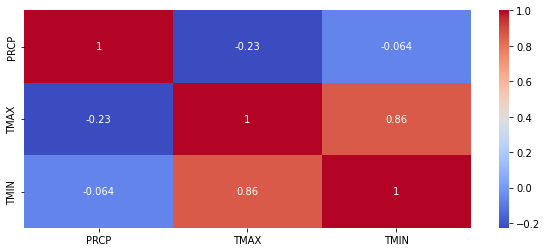

In [17]:
plt.figure(figsize = (10, 4))
sns.heatmap(corr_matrix,  
            annot = True, 
            cmap = 'coolwarm')

# Encoding 

Encoding is the process of converting data from one format or representation to another. In the context of data analysis and machine learning, encoding refers to transforming categorical or textual data into numerical representations that can be processed by algorithms.

Label Encoding: Label encoding is used to convert categorical variables with ordinal relationships into numerical representations. Each unique category is assigned a numerical label. For example, if you have a feature with categories like "Low," "Medium," and "High," you can assign them labels like 0, 1, and 2, respectively.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()

In [25]:
dataframe['RAIN'] = encoder.fit_transform(dataframe['RAIN'])

In [26]:
dataframe.head()

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,1
1,0.59,45,36,1
2,0.42,45,35,1
3,0.31,45,34,1
4,0.17,45,32,1


In [27]:
dataframe.columns

Index(['PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

## Correlation with Rain

In [28]:
dataset = dataframe.drop('RAIN', axis = 1)

In [29]:
dataset.head()

,PRCP,TMAX,TMIN
0,0.47,51,42
1,0.59,45,36
2,0.42,45,35
3,0.31,45,34
4,0.17,45,32


<AxesSubplot:title={'center':'Correlation with Rain'}>

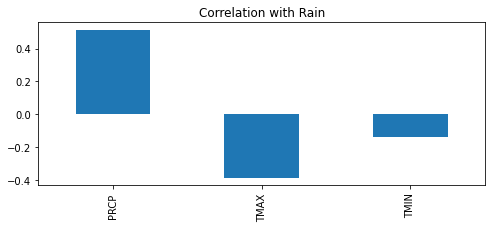

In [30]:
dataset.corrwith(dataframe['RAIN']).plot.bar(
    figsize = (8, 3),
    title = 'Correlation with Rain',
    rot = 90
)

In [31]:
dataframe.head()

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,1
1,0.59,45,36,1
2,0.42,45,35,1
3,0.31,45,34,1
4,0.17,45,32,1


# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = dataframe.drop('RAIN', axis = 1)
y = dataframe['RAIN']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20438, 3), (5110, 3), (20438,), (5110,))

# Scaling

Scaling is a preprocessing technique used in machine learning to transform the input features to a similar scale. It is often necessary because features can have different units, ranges, or magnitudes, which can affect the performance of certain algorithms. Scaling ensures that all features contribute equally to the learning process and prevents features with larger values from dominating those with smaller values.

StandardScaler is a commonly used method for scaling numerical features in machine learning. It is part of the preprocessing module in scikit-learn, a popular machine learning library in Python.

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
x_train

array([[-0.44224566,  1.44282363,  1.17519733],
       [-0.44224566,  2.22455805,  2.29701004],
       [-0.44224566,  0.58291577,  0.05338463],
       ...,
       [-0.44224566,  0.50474233,  0.50210971],
       [-0.44224566,  0.11387512, -0.39534045],
       [-0.44224566,  0.8174361 ,  0.1655659 ]])

In [40]:
x_test

array([[ 1.13936557, -1.29324684, -0.84406554],
       [-0.44224566,  0.73926266,  0.72647225],
       [-0.44224566,  1.83369084,  1.17519733],
       ...,
       [-0.23413892,  0.03570168,  0.38992844],
       [-0.44224566,  1.59917052,  0.27774717],
       [-0.44224566,  0.03570168,  0.27774717]])

In [41]:
x_train.shape, x_test.shape

((20438, 3), (5110, 3))

In [42]:
x_train = x_train.reshape(20438, 3, 1)
x_test = x_test.reshape(5110, 3, 1)

In [43]:
x_train.shape, x_test.shape

((20438, 3, 1), (5110, 3, 1))

# Building Model

Creating a deep learning model involves defining the architecture and structure of the neural network, specifying the layers, and configuring the parameters for training.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
model = Sequential()
model.add(Conv1D(32, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (3, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 3, 32)             96        
                                                                 
 batch_normalization_3 (Batc  (None, 3, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 3, 32)             0         
                                                                 
 conv1d_6 (Conv1D)           (None, 3, 64)             4160      
                                                                 
 batch_normalization_4 (Batc  (None, 3, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 3, 64)            

Early stopping is a technique used during the training of machine learning models to prevent overfitting and find the optimal point at which to stop training. It involves monitoring the performance of the model on a validation dataset and stopping the training process when the model's performance on the validation dataset starts to degrade.

In [53]:
early_stop = EarlyStopping(monitor = 'val_loss', 
                           patience = 3, 
                           restore_best_weights = True)

# Compiling Model

Compiling the model in deep learning involves configuring essential components that define how the model will be trained.

In [54]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

# Training Model

Training the model in deep learning involves the process of iteratively updating the model's parameters (weights and biases) based on the provided training data to minimize the loss function and improve the model's performance.

In [55]:
model.fit(x_train, y_train, 
          epochs = 250, 
          validation_data = (x_test, y_test) ,
          callbacks = [early_stop])

Epoch 1/250
639/639 [==============================] - 15s 11ms/step - loss: 0.1058 - accuracy: 0.8566 - val_loss: 0.0513 - val_accuracy: 0.9286
Epoch 2/250
639/639 [==============================] - 7s 11ms/step - loss: 0.0643 - accuracy: 0.9152 - val_loss: 0.0382 - val_accuracy: 0.9487
Epoch 3/250
639/639 [==============================] - 7s 11ms/step - loss: 0.0478 - accuracy: 0.9393 - val_loss: 0.0390 - val_accuracy: 0.9515
Epoch 4/250
639/639 [==============================] - 7s 11ms/step - loss: 0.0352 - accuracy: 0.9555 - val_loss: 0.0148 - val_accuracy: 0.9779
Epoch 5/250
639/639 [==============================] - 7s 11ms/step - loss: 0.0280 - accuracy: 0.9650 - val_loss: 0.0294 - val_accuracy: 0.9624
Epoch 6/250
639/639 [==============================] - 7s 10ms/step - loss: 0.0261 - accuracy: 0.9672 - val_loss: 0.0032 - val_accuracy: 0.9969
Epoch 7/250
639/639 [==============================] - 8s 12ms/step - loss: 0.0220 - accuracy: 0.9726 - val_loss: 0.0100 - val_accuracy

In [56]:
model.save('model_rain_forecast.h5')

# Learning Curve

The learning curve is a plot that shows how the loss and accuracy of a model change during training. It provides insights into how well the model is learning from the training data and how it generalizes to unseen data. The learning curve typically shows the training and validation loss/accuracy on the y-axis and the number of epochs on the x-axis. By analyzing the learning curve, you can identify if the model is overfitting (high training loss, low validation loss) or underfitting (high training and validation loss). It is a useful tool for monitoring and evaluating the performance of machine learning models.

In [57]:
losses = pd.DataFrame(model.history.history)

In [58]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.105807,0.856640,0.051285,0.928571
1,0.064315,0.915207,0.038176,0.948728
2,0.047840,0.939329,0.038957,0.951468
3,0.035202,0.955475,0.014781,0.977886
4,0.027966,0.965016,0.029385,0.962427


<AxesSubplot:>

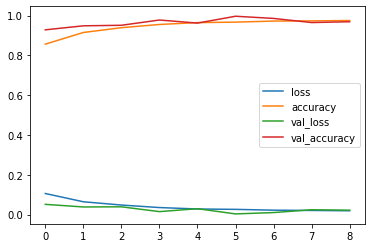

In [59]:
losses.plot()

<AxesSubplot:>

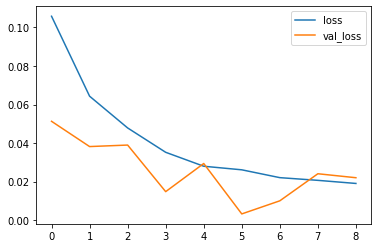

In [60]:
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

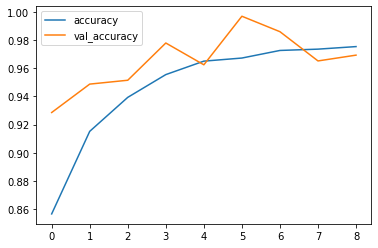

In [61]:
losses[['accuracy', 'val_accuracy']].plot()

# Prediction

In [62]:
y_pred = model.predict(x_test)
predict_class = y_pred.argmax(axis = 1)

160/160 [==============================] - 1s 4ms/step


In [65]:
print(y_test.iloc[4]), print(y_pred[4])

1
[0.99996454]


(None, None)

In [67]:
print(y_test.iloc[20]), print(y_pred[20])

0
[0.00011596]


(None, None)

# Error Analysis

Error analysis is an important step in evaluating and improving the performance of a machine learning model. It involves analyzing the errors made by the model during prediction or classification tasks and gaining insights into the types of mistakes it is making. Error analysis can provide valuable information for model refinement and identifying areas for improvement

A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. It is a useful tool for evaluating the accuracy and effectiveness of a classification model.

In [68]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix = confusion_matrix(y_test, predict_class)

In [72]:
confusion_matrix

array([[2953,    0],
       [2157,    0]], dtype=int64)

<AxesSubplot:>

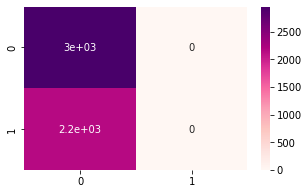

In [75]:
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix, 
            annot = True, 
            cmap = 'RdPu')